In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from surrogate_model import SurrogateModel
import ConfigSpace

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c



In [4]:
config_space = ConfigSpace.ConfigurationSpace.from_json('lcdb_config_space_knn.json')
df = pd.read_csv('config_performances_dataset-6.csv')
surrogate_model = SurrogateModel(config_space)
surrogate_model.fit(df)

In [8]:
anchors = sorted(df['anchor_size'].unique())
print(anchors[0],anchors[-1])

16 16000


c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)
c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)
c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, s

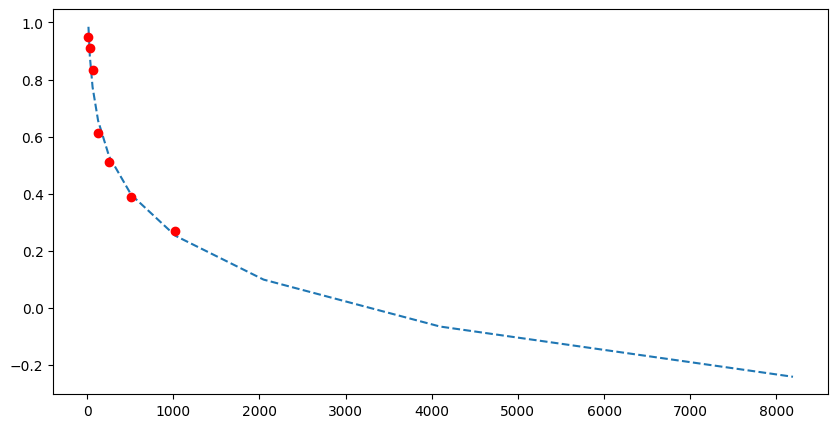

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


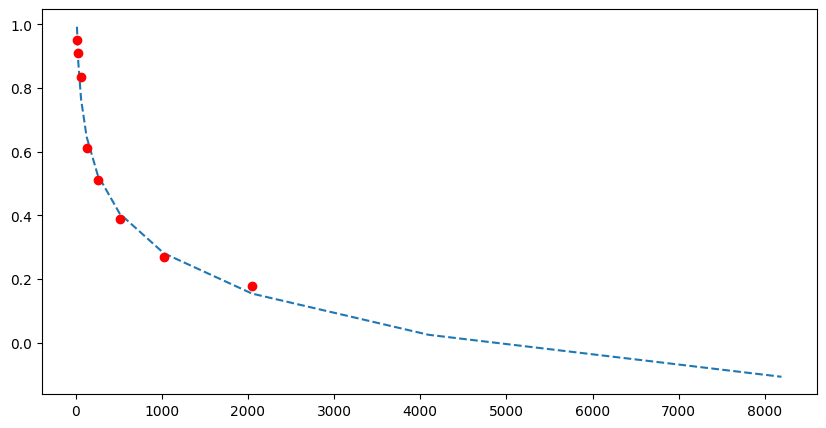

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


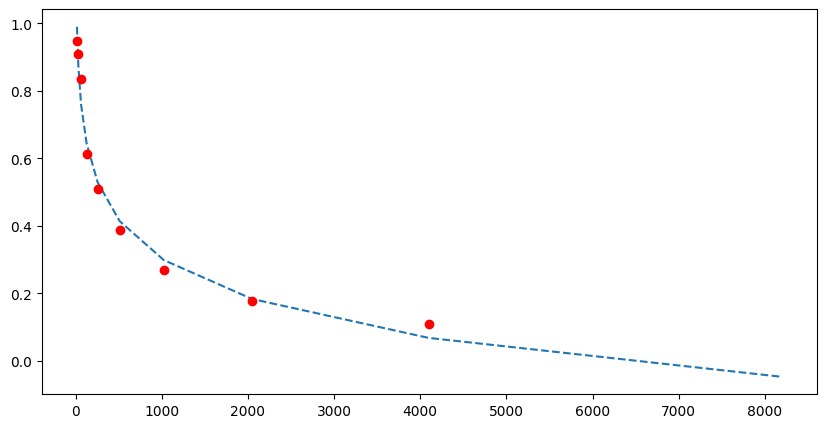

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


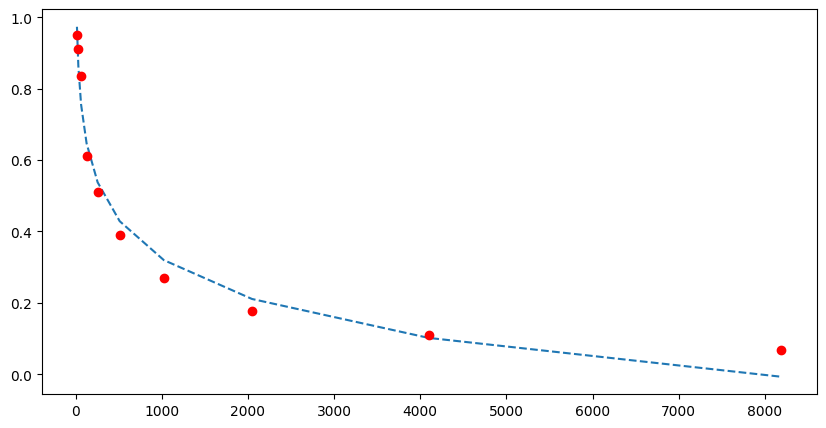

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


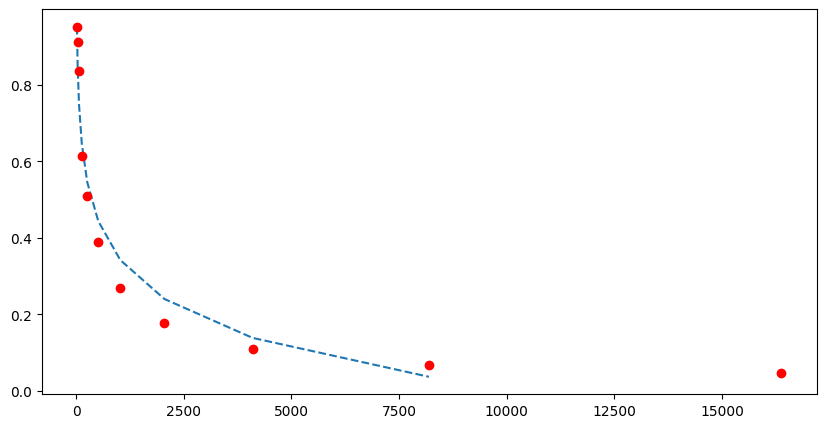

c:\courses\AML\AutoML\A2\config_encoder.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[param.name] = df[param.name].fillna(param.default_value)


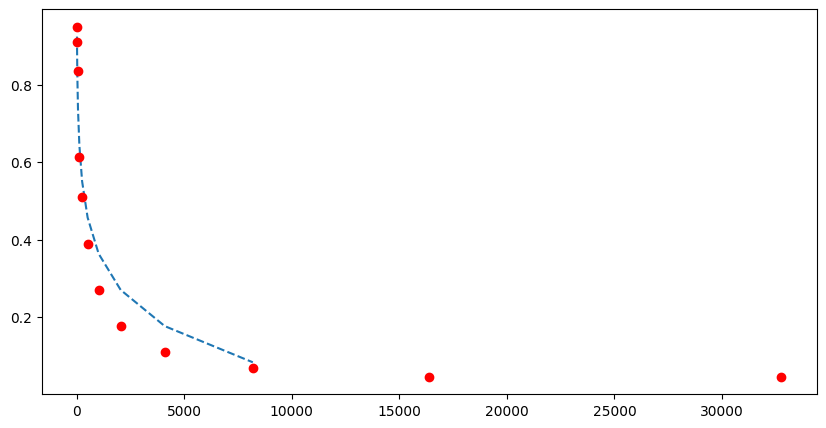

In [27]:
min_anchor = df.anchor_size.min()
max_anchor = df.anchor_size.max()
anchors = []
anchor = min_anchor
while anchor < max_anchor:
    anchors.append(anchor)
    anchor *=2
configuration = dict(config_space.sample_configuration())
results = []
for i in range(12):
    anchor = min_anchor * (2**i)
    configuration["anchor_size"] = anchor
    config = pd.DataFrame([dict(configuration)])
    performance = surrogate_model.predict(config)[0]
    results.append((anchor,performance))
    if len(results)>6:
        X = np.array([x for x,_ in results])
        y = np.array([y for _,y in results])

        target_func = func_powerlaw

        popt, pcov = curve_fit(target_func, X, y,maxfev=5000)

        plt.figure(figsize=(10, 5))
        plt.plot(anchors, target_func(anchors, *popt), '--')
        plt.plot(X, y, 'ro')
        plt.show()

In [22]:
results

[(16, 0.9461760000000009),
 (32, 0.9162030000000001),
 (64, 0.8677840000000002),
 (128, 0.689161),
 (256, 0.5830440000000003),
 (512, 0.45018699999999934),
 (1024, 0.3138200000000001),
 (2048, 0.20450100000000015),
 (4096, 0.12593799999999988),
 (8192, 0.07528999999999994)]

In [29]:
target_func(max_anchor, *popt)

-0.00680856481903902

In [1]:
import pandas as pd

In [2]:
pd.DataFrame({'dataset-6': {'error': (3.216740164645107e-05, 2.0349805547428335e-06), 'r2': (0.9996875721757923, 2.0359621886568754e-05)}, 'dataset-11': {'error': (2.5358348125930887e-05, 2.597615878923163e-06), 'r2': (0.9984874268613403, 0.00016142716062538814)}, 'dataset-1457': {'error': (5.8255700432900574e-05, 1.267085537891093e-05), 'r2': (0.9949499273369945, 0.0012243567790219706)}})

,dataset-6,dataset-11,dataset-1457
error,"(3.216740164645107e-05, 2.0349805547428335e-06)","(2.5358348125930887e-05, 2.597615878923163e-06)","(5.8255700432900574e-05, 1.267085537891093e-05)"
r2,"(0.9996875721757923, 2.0359621886568754e-05)","(0.9984874268613403, 0.00016142716062538814)","(0.9949499273369945, 0.0012243567790219706)"


In [3]:
df = pd.read_csv('surrogate_model_verified.csv')

In [5]:
print(df.to_latex())

\begin{tabular}{lllll}
\toprule
 & Unnamed: 0 & dataset-6 & dataset-11 & dataset-1457 \\
\midrule
0 & error & 3.017e-05,2.16e-06 & 2.461e-05,2.28e-06 & 5.489e-05,7.21e-06 \\
1 & r2 & 1.00,0.00 & 1.00,0.00 & 1.00,0.00 \\
\bottomrule
\end{tabular}



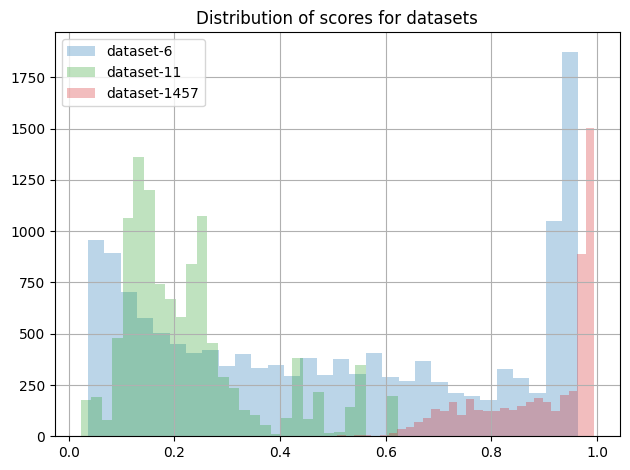

In [9]:
import matplotlib.pyplot as plt
data_sets = ['config_performances_dataset-6.csv',
            'config_performances_dataset-11.csv',
            'config_performances_dataset-1457.csv']
colors = ['tab:blue','tab:green','tab:red']

results = {}
for data_set,color in zip(data_sets,colors):
    data = pd.read_csv(data_set)
    name = data_set.split('_')[-1][:-4]
    plt.hist(data['score'], bins=30, color=color, alpha=0.3, label=name)
plt.legend()
plt.title('Distribution of scores for datasets')
plt.tight_layout()
plt.grid(True)
plt.savefig('surrogate_data.png')  

In [2]:
data_dict = {}
for data_set,color in zip(data_sets,colors):
    name = data_set.split('_')[-1][:-4]
    data_dict[name] = pd.read_csv(data_set)

NameError: name 'data_sets' is not defined

In [16]:
for name,data_set in data_dict.items():
    print(name)
    print(data_set['anchor_size'].describe())

dataset-6
count    13923.000000
mean      2643.619048
std       4240.933087
min         16.000000
25%         91.000000
50%        512.000000
75%       2896.000000
max      16000.000000
Name: anchor_size, dtype: float64
dataset-11
count    11220.000000
mean       154.363636
std        150.710081
min         16.000000
25%         32.000000
50%         91.000000
75%        256.000000
max        500.000000
Name: anchor_size, dtype: float64
dataset-1457
count    5236.000000
mean      332.714286
std       376.774698
min        16.000000
25%        45.000000
50%       154.500000
75%       512.000000
max      1200.000000
Name: anchor_size, dtype: float64


In [1]:
data_set

NameError: name 'data_set' is not defined

In [38]:
config_space = ConfigSpace.ConfigurationSpace.from_json('lcdb_config_space_knn.json')
for param in config_space.values():
    # either the column doesnt exist -> add and fill with default
    if param.name not in df.columns:
        df[param.name] = param.default_value
    # or it does, but there are missing values -> fill with defaults
    else:
        type_before = df[param.name].dtype
        df[param.name] = df[param.name].fillna(param.default_value)
        type_after = df[param.name].dtype
        if type_before!=type_after:
            print(type_before, type_after)
            print(param)

        

In [40]:
df = pd.read_csv('config_performances_dataset-6.csv')

In [44]:
theta_new = dict(config_space.sample_configuration())

In [45]:
pd.DataFrame(theta_new,dtype = typing_dict)

{'metric': 'cosine',
 'n_neighbors': 4,
 'pp@cat_encoder': 'onehot',
 'pp@decomposition': 'lda',
 'pp@featuregen': 'poly',
 'pp@featureselector': 'none',
 'pp@scaler': 'std',
 'weights': 'uniform',
 'pp@poly_degree': 2,
 'pp@std_with_std': True}

In [46]:
typing_dict = df.dtypes.to_dict()

In [28]:
theta = df.dtypes
theta['pp@std_with_std']

dtype('bool')

In [58]:
import pickle 
with open('result_dicts.pk','rb') as f:
    evaluations_dict, termination_dict = pickle.load(f)

In [54]:
evaluations = 0
for anchor,evalu in evaluations_dict.items():
    evaluations+= anchor*evalu 

evaluations/anchor

118.7768125

In [72]:
termination_dict

{16: 0,
 23: 10,
 32: 8,
 45: 32,
 64: 0,
 91: 0,
 128: 0,
 181: 0,
 256: 0,
 362: 0,
 512: 0,
 724: 0,
 1024: 0,
 1448: 0,
 2048: 0,
 2896: 0,
 4096: 0,
 5793: 10,
 8192: 3,
 11585: 25,
 16000: 5}

In [80]:
y = [termination_dict[anchor] for anchor in anchors]

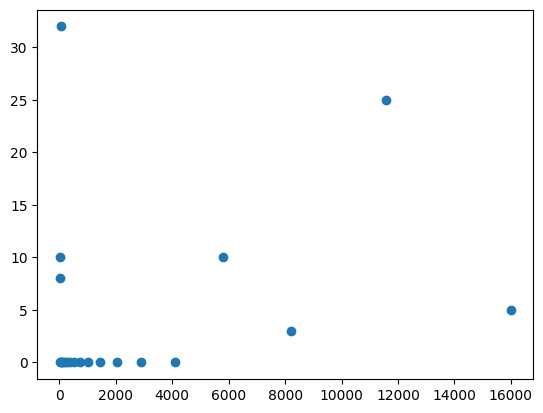

In [81]:
plt.scatter(anchors,y)
plt.show()

In [69]:


test_dict = {key:0 for key in [0,1,2,3]}
test_dict2 = {key:0 for key in [0,1,2,3]}

In [70]:
test_dict[2]+=1
test_dict, test_dict2

({0: 0, 1: 0, 2: 1, 3: 0}, {0: 0, 1: 0, 2: 0, 3: 0})

In [ ]:
data_files = ['config_performances_dataset-6.csv',
                  'config_performances_dataset-11.csv',
                  'config_performances_dataset-1457.csv']
df = pd.DataFrame(,index=[('IPL','score'),('IPL','evaluations')])

In [109]:
data_files = ['config_performances_dataset-6.csv',
                  'config_performances_dataset-11.csv',
                  'config_performances_dataset-1457.csv']

data_sets = {data_file.split('_')[2][:-4]:pd.read_csv(data_file) for data_file in data_files}

In [113]:
data_sets.keys()
for key in data_sets.keys():
    print(key,data_sets[key]['score'].min())


dataset-6 0.0368
dataset-11 0.0225806451612903
dataset-1457 0.508


In [ ]:
[('IPL','score'),('IPL','evaluations')],names=["Method", "Score"])

MultiIndex([('IPL',       'score'),
            ('IPL', 'evaluations')],
           names=['Method', 'Score'])

In [ ]:
from itertools import product


tuples = [(a,b) for a,b in product(['LCCV','IPL'],['score','evaluations'])]
index = pd.MultiIndex.from_tuples(tuples,names=['method','score'])


dataset-6 dataset-11 dataset-1457
method score                                        
LCCV   score             NaN        NaN          NaN
       evaluations       NaN        NaN          NaN
IPL    score             NaN        NaN          NaN
       evaluations       NaN        NaN          NaN

In [121]:
results2 = pd.read_csv('comparison_results_v1.csv')

In [100]:
columns=[data_file.split('_')[-1][:-4] for data_file in data_files]
result_df = pd.DataFrame(columns=columns ,index=index)

In [117]:
print(results.to_latex())

\begin{tabular}{llllll}
\toprule
 & method & score & dataset-6 & dataset-11 & dataset-1457 \\
\midrule
0 & LCCV & score & 0.04 std 0.001 & 0.04 std 0.008 & 0.74 std 0.087 \\
1 & LCCV & evaluations & 120.51 std 10.727 & 57.10 std 4.443 & 6.44 std 0.333 \\
2 & IPL & score &  0.05 std 0.008 &  0.03 std 0.003 &  0.74 std 0.097 \\
3 & IPL & evaluations & 32.61 std 9.890 & 196.39 std 12.688 & 7.45 std 0.188 \\
\bottomrule
\end{tabular}



In [119]:
results

,method,score,dataset-6,dataset-11,dataset-1457
0,LCCV,score,0.04 std 0.001,0.04 std 0.007,0.73 std 0.075
1,LCCV,evaluations,111.74 std 13.270,58.04 std 5.461,6.38 std 0.235
2,IPL,score,0.05 std 0.010,0.03 std 0.004,0.72 std 0.096
3,IPL,evaluations,36.25 std 8.696,203.97 std 13.998,7.40 std 0.178


In [124]:
print(results2.to_latex())

\begin{tabular}{llllll}
\toprule
 & method & score & dataset-6 & dataset-11 & dataset-1457 \\
\midrule
0 & LCCV & score & 0.04 std 0.001 & 0.04 std 0.008 & 0.74 std 0.087 \\
1 & LCCV & evaluations & 120.51 std 10.727 & 57.10 std 4.443 & 6.44 std 0.333 \\
2 & IPL & score &  0.05 std 0.008 &  0.03 std 0.003 &  0.74 std 0.097 \\
3 & IPL & evaluations & 32.61 std 9.890 & 196.39 std 12.688 & 7.45 std 0.188 \\
\bottomrule
\end{tabular}



In [5]:
results3 = pd.read_csv('comparison_results.csv')
print(results3.to_latex())

\begin{tabular}{llllll}
\toprule
 & method & score & dataset-6 & dataset-11 & dataset-1457 \\
\midrule
0 & LCCV & score & 0.04 std 0.001 & 0.04 std 0.010 & 0.55 std 0.047 \\
1 & LCCV & evaluations & 117.90 std 14.113 & 62.87 std 3.876 & 97.94 std 17.084 \\
2 & IPL & score &  0.05 std 0.007 &  0.03 std 0.004 &  0.55 std 0.044 \\
3 & IPL & evaluations & 31.41 std 10.751 & 121.57 std 12.710 & 100.25 std 20.336 \\
\bottomrule
\end{tabular}



In [6]:
results3

,method,score,dataset-6,dataset-11,dataset-1457
0,LCCV,score,0.04 std 0.001,0.04 std 0.010,0.55 std 0.047
1,LCCV,evaluations,117.90 std 14.113,62.87 std 3.876,97.94 std 17.084
2,IPL,score,0.05 std 0.007,0.03 std 0.004,0.55 std 0.044
3,IPL,evaluations,31.41 std 10.751,121.57 std 12.710,100.25 std 20.336


In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv('config_performances_dataset-11.csv')
train_data, test_data = train_test_split(data)

In [2]:
train_data.shape, test_data.shape

((8415, 16), (2805, 16))

In [3]:
len(train_data)/len(data)

0.75